<a href="https://colab.research.google.com/github/marshallexperiment/Infinite-learning-projects/blob/main/Marshall_LSTM_menggunakan_Data_Bapetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Data Komoditas 1 Sampel (Lada Putih)
## Oleh: Muhammad Marshall Al Karim



###  1. Persiapan Lingkungan di Colab
> menginstal TensorFlow dan library yang diperlukan



In [ ]:
# Pastikan TensorFlow sudah terinstal di Colab
!pip install tensorflow
!pip install pandas scikit-learn matplotlib
!pip install numpy

### 2. Memuat Data di Google Colab
> Menggungah Data

In [ ]:
# Langkah ini memungkinkan Anda mengunggah file dari lokal
from google.colab import files
uploaded = files.upload()

# Kemudian gunakan pandas untuk membaca file
import pandas as pd

# Mengimpor dataset
data = pd.read_csv(list(uploaded.keys())[0], delimiter='\t')

# Menampilkan beberapa baris pertama
data.head()


Saving Test.csv to Test.csv


,Commodity,Region,Index,Price,Date
0,LADA PUTIH,BANGKA,1,57000,7/5/2018
1,LADA PUTIH,BANGKA,2,58000,8/5/2018
2,LADA PUTIH,BANGKA,3,58000,9/5/2018
3,LADA PUTIH,BANGKA,4,58000,10/5/2018
4,LADA PUTIH,BANGKA,5,58500,11/5/2018


### 3. Preprocessing Data (Dalam Kasus Ini adalah Lada Putih)
> Mengubah Kolom 'Date' Menjadi Tipe Datetime, Mengatasi Missing Values, Mengurutkan Data Berdasarkan Tanggal, Reset Index, Menampilkan Informasi Data,

In [ ]:
# Mengonversi kolom 'Date' menjadi datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
# Menghapus baris dengan nilai tanggal yang kosong
data = data.dropna(subset=['Date'])
# Mengurutkan data berdasarkan tanggal
data = data.sort_values('Date')
# Mereset index
data = data.reset_index(drop=True)
# Informasi dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  132 non-null    object        
 1   Region     132 non-null    object        
 2   Index      132 non-null    int64         
 3   Price      132 non-null    int64         
 4   Date       132 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ KB
None


### 4. Visualisasi Data


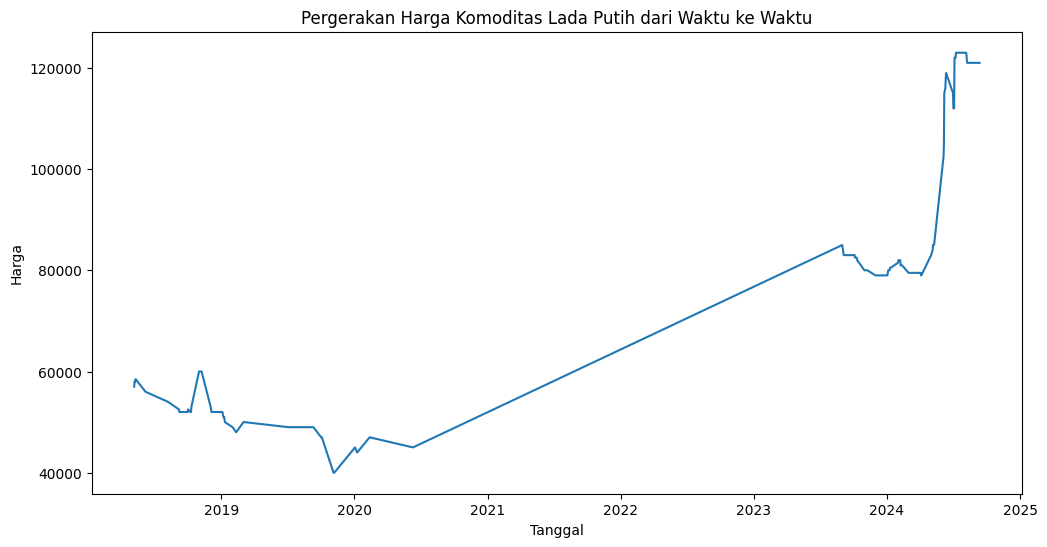

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Price'])
plt.title('Pergerakan Harga Komoditas Lada Putih dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.show()


### 5. Menyiapkan Data untuk Model LSTM
> Menggunakan Hanya Fitur Harga dan Menormalisasi harga

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Menggunakan kolom 'Price' sebagai dataset
dataset = data['Price'].values
dataset = dataset.reshape(-1, 1)
# Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)


### 6. Membuat Struktur Data untuk LSTM


In [ ]:
import numpy as np
# Misalnya, 80% untuk pelatihan dan 20% untuk pengujian.
# Menentukan timestep
timestep = 60

# Membuat data pelatihan
X = []
y = []

for i in range(timestep, len(dataset_scaled)):
    X.append(dataset_scaled[i-timestep:i, 0])
    y.append(dataset_scaled[i, 0])

X = np.array(X)
y = np.array(y)

# Membagi Data Menjadi Data Pelatihan dan Pengujian
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Mengubah Bentuk Data agar Sesuai dengan Input LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### 7. Membangun Model LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


### 8. Kompilasi dan Pelatihan Model


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=30, batch_size=32)


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0017
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0013
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0025
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 8.7152e-04
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0017
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0014
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.3181e-04
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0013
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 6.5182e-04
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 3.9149e-04
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 7.9283e-04
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 4.5223e-04
Epoch 13/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 2.8698e-04
Epoch 14/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0011
Epoch 15/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89m

### 9. Membuat Prediksi dan Mengevaluasi Model


In [ ]:
# Melakukan Prediksi
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
# Mengembalikan y_test ke skala asli
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# Menghitung Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print('RMSE:', rmse)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
RMSE: 7256.557762760956


### 10. Visualisasi Hasil Prediksi (Range 2 Bulan)


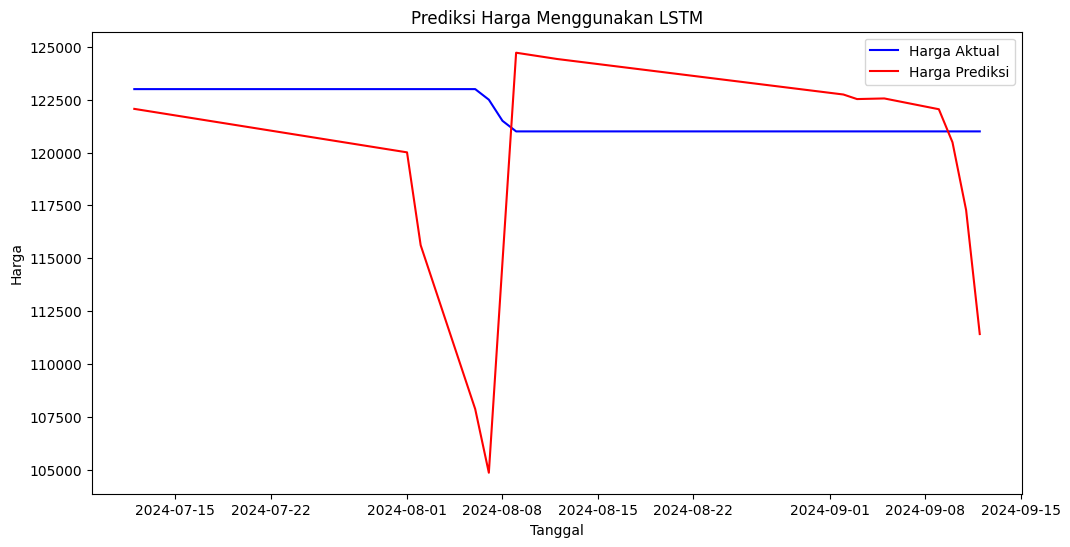

In [ ]:
# Plot hasil prediksi vs data aktual
plt.figure(figsize=(12,6))
plt.plot(data['Date'][len(data)-len(y_test_actual):], y_test_actual, color='blue', label='Harga Aktual')
plt.plot(data['Date'][len(data)-len(predictions):], predictions, color='red', label='Harga Prediksi')
plt.title('Prediksi Harga Menggunakan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

### 11. Prediksi Masa Depan


In [ ]:
# Mengambil data terakhir untuk prediksi
last_60_days = dataset_scaled[-timestep:]
X_future = []
X_future.append(last_60_days)
X_future = np.array(X_future)
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Prediksi harga masa depan
future_price_scaled = model.predict(X_future)
future_price = scaler.inverse_transform(future_price_scaled)
print('Prediksi Harga untuk Hari Berikutnya:', future_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
Prediksi Harga untuk Hari Berikutnya: 105484.42


### Kesimpulan
> Keseluruhan prediksi
<br>
>
Bahwa hasil training yang kami kerjakan tergantung iterasi epoch dari satu sampel komoditas (Lada hitam)
kemampuan Google Colab di max 300 Epochs.
Perlu High peformance cloud computing untuk mendapatkan prediksi yang lebih tajam.
> Referensi Data
>
[1]  https://infoharga.bappebti.go.id/